In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer


In [39]:
data_path = 'train.csv'
train_df = pd.read_csv(data_path)
train_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [40]:
train_df.describe()

,label,binary-label
count,9324.000000,9324.000000
mean,1.849968,0.389532
std,1.602212,0.487670
min,0.000000,0.000000
25%,0.200000,0.000000
50%,1.600000,0.000000
75%,3.400000,1.000000
max,5.000000,1.000000


In [41]:
model_checkpoint = 'klue/roberta-small'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [42]:
test = tokenizer(train_df['sentence_1'][0])
test

{'input_ids': [0, 15314, 2119, 2689, 2088, 8984, 2119, 1513, 2088, 11934, 3629, 16516, 6614, 2031, 19521, 2259, 4540, 2052, 4405, 2203, 2182, 97, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [43]:
decode_str = tokenizer.decode(test["input_ids"])
decode_str

'[CLS] 스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요 ~ [SEP]'

In [45]:
train_df['token_1'] = train_df['sentence_1'].apply(tokenizer.tokenize)
train_df['token_2'] = train_df['sentence_2'].apply(tokenizer.tokenize)
train_df

,id,source,sentence_1,sentence_2,label,binary-label,token_1,token_2
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,"[스릴, ##도, ##있, ##고, 반전, ##도, 있, ##고, 여느, 한국, #...","[반전, ##도, 있, ##고, ,, 사랑, ##도, 있, ##고, ##재, ##미..."
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,"[앗, 제, ##가, 접근, ##권, ##한, ##이, 없, ##다고, [UNK],...","[오, ,, 액세, ##스, 권한, ##이, 없, ##다고, 합니다, .]"
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,"[주택, ##청, ##약, ##조건, 변경, ##해, ##주, ##세요, .]","[주택, ##청, ##약, 무주택, ##기, ##준, 변경, ##해, ##주, ##..."
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,"[입사, ##후, 처음, 대면, ##으로, 만나, 반가웠, ##습, ##니다, .]","[화상, ##으로, ##만, 보다, ##가, 리얼, ##로, 만나, ##니, 정말,..."
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,"[뿌듯, ##뿌, ##듯, 하, ##네, ##요, !, !]","[꼬, ##옥, 실제로, 한번, 뵈, ##어요, 뿌, ##뿌, ##뿌, ~, !, ..."
...,...,...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0,"[교원, ##능력, ##개발, ##평가, ##에서, 교원, ##이, 보호, ##받,...","[본인, ##이, 납부, ##한, 국민, ##연금, 금액, ##을, 기준, ##으로..."
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0,"[여성, ##가족, ##부, ##의, 폐지, ##를, 원, ##합, ##니, ##드]","[여성, ##가족, ##부, 폐지, ##를, 청원, 합니다, .]"
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0,"[국회의원, ##들, 월급, ##좀, 줄여, ##주, ##세요]","[공무원, 봉급, ##좀, 줄이, ##지, ##좀, 마세요]"
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0,"[오늘, 못한, 점심, ##은, 다음, ##에, 다시, 츄, ##라이, 하, ##기...","[오늘, 못, ##먹, ##은, 밥, ##은, 꼭, 담, ##에, 먹, ##기, #..."


In [46]:
train_df["token_len1"] = train_df['token_1'].apply(len)
train_df["token_len2"] = train_df['token_2'].apply(len)
train_df

,id,source,sentence_1,sentence_2,label,binary-label,token_1,token_2,token_len1,token_len2
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,"[스릴, ##도, ##있, ##고, 반전, ##도, 있, ##고, 여느, 한국, #...","[반전, ##도, 있, ##고, ,, 사랑, ##도, 있, ##고, ##재, ##미...",21,16
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,"[앗, 제, ##가, 접근, ##권, ##한, ##이, 없, ##다고, [UNK],...","[오, ,, 액세, ##스, 권한, ##이, 없, ##다고, 합니다, .]",12,10
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,"[주택, ##청, ##약, ##조건, 변경, ##해, ##주, ##세요, .]","[주택, ##청, ##약, 무주택, ##기, ##준, 변경, ##해, ##주, ##...",9,11
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,"[입사, ##후, 처음, 대면, ##으로, 만나, 반가웠, ##습, ##니다, .]","[화상, ##으로, ##만, 보다, ##가, 리얼, ##로, 만나, ##니, 정말,...",10,14
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,"[뿌듯, ##뿌, ##듯, 하, ##네, ##요, !, !]","[꼬, ##옥, 실제로, 한번, 뵈, ##어요, 뿌, ##뿌, ##뿌, ~, !, ...",8,13
...,...,...,...,...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0,"[교원, ##능력, ##개발, ##평가, ##에서, 교원, ##이, 보호, ##받,...","[본인, ##이, 납부, ##한, 국민, ##연금, 금액, ##을, 기준, ##으로...",18,23
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0,"[여성, ##가족, ##부, ##의, 폐지, ##를, 원, ##합, ##니, ##드]","[여성, ##가족, ##부, 폐지, ##를, 청원, 합니다, .]",10,8
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0,"[국회의원, ##들, 월급, ##좀, 줄여, ##주, ##세요]","[공무원, 봉급, ##좀, 줄이, ##지, ##좀, 마세요]",7,7
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0,"[오늘, 못한, 점심, ##은, 다음, ##에, 다시, 츄, ##라이, 하, ##기...","[오늘, 못, ##먹, ##은, 밥, ##은, 꼭, 담, ##에, 먹, ##기, #...",15,16


<AxesSubplot: xlabel='count', ylabel='source'>

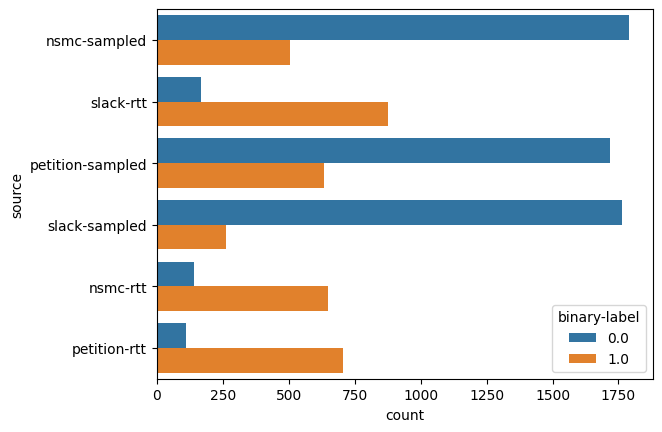

In [47]:
sns.countplot(y='source',hue='binary-label',data=train_df)

Text(0, 0.5, 'token_len')

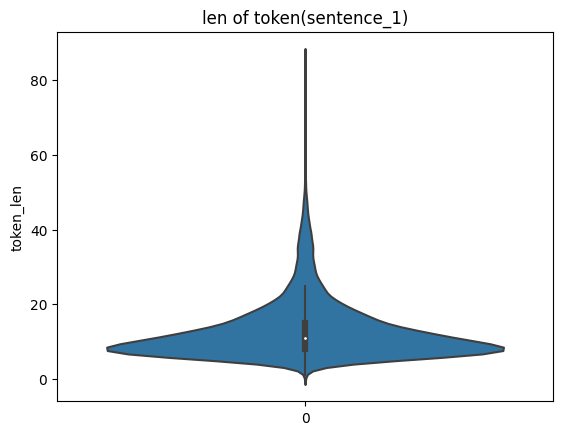

In [48]:
g = sns.violinplot(data=train_df['token_1'].apply(len))
plt.title("len of token(sentence_1)")
plt.ylabel("token_len")

Text(0, 0.5, 'token_len')

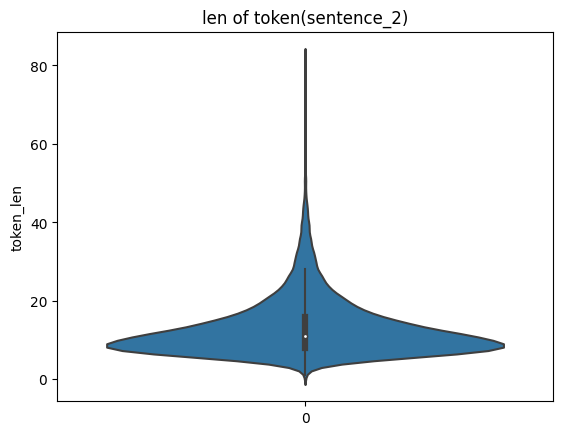

In [49]:
g = sns.violinplot(data=train_df['token_2'].apply(len))
plt.title("len of token(sentence_2)")
plt.ylabel("token_len")

In [50]:
rtt_df = train_df[train_df.source.isin(["nsmc-rtt", "slack-rtt", "petition-rtt"])]
sampled_df = train_df[train_df.source.isin(["nsmc-sampled", "slack-sampled", "petition-sampled"])]

<AxesSubplot: xlabel='label', ylabel='Density'>

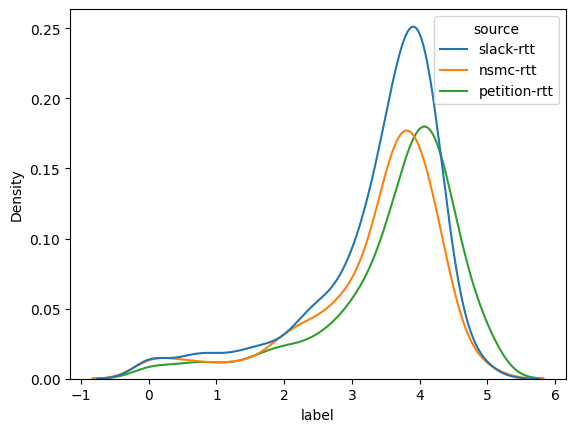

In [51]:
g = sns.kdeplot(
    x="label",
    hue='source',
    data=rtt_df,
    multiple='layer'
)
g

<AxesSubplot: xlabel='label', ylabel='Density'>

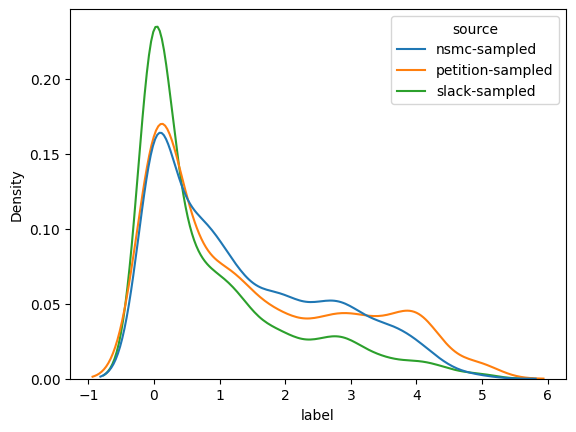

In [38]:
g = sns.kdeplot(
    x="label",
    hue='source',
    data=sampled_df,
    multiple='layer'
)
g

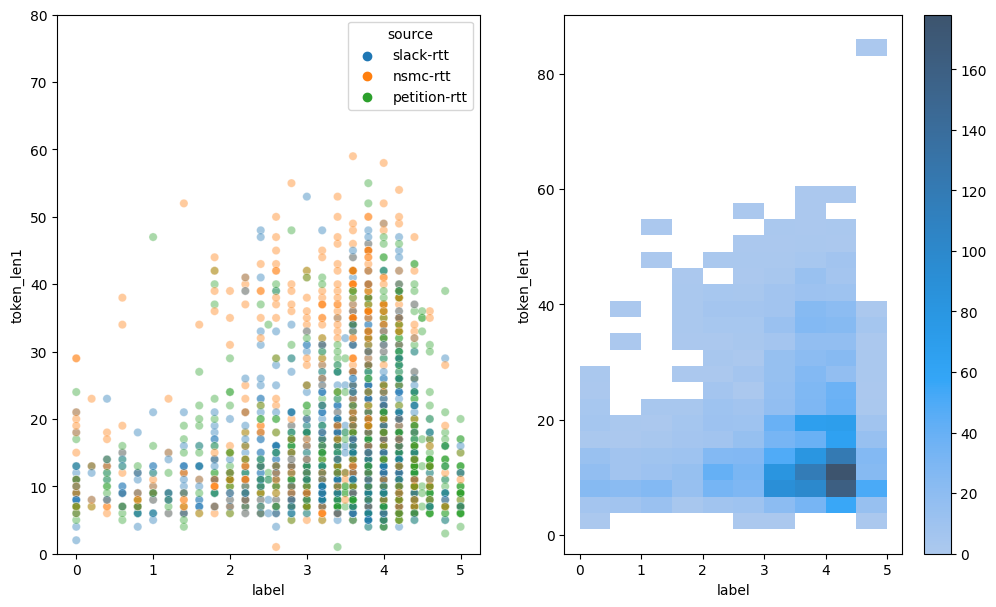

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
sns.scatterplot(
    x="label",
    y="token_len1",
    data=rtt_df,
    ax=axes[0],
    hue='source',
    alpha=0.4)
axes[0].set_ylim(0, 80)
g = sns.histplot(x='label', y="token_len1",data=rtt_df, bins=(10,30),cbar=True, ax=axes[1])

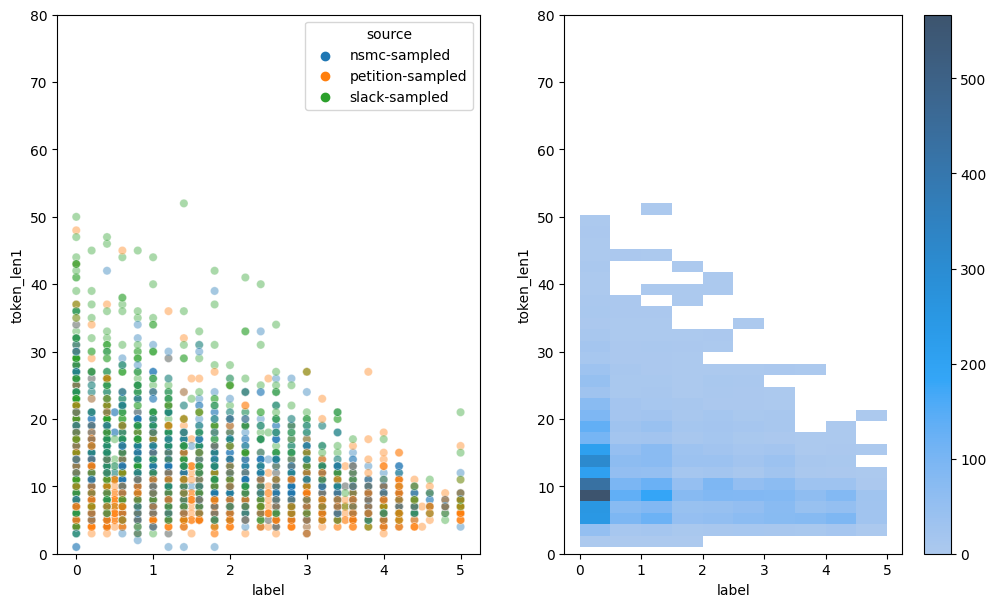

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
g1 = sns.scatterplot(
    x="label",
    y="token_len1",
    data=sampled_df,
    ax=axes[0],
    hue='source',
    alpha=0.4)
g2 = sns.histplot(x='label', y="token_len1",data=sampled_df, bins=(10,30),cbar=True, ax=axes[1])
axes[0].set_ylim(0, 80)
axes[1].set_ylim(0, 80)
plt.show()

(0.0, 80.0)

<Figure size 640x480 with 0 Axes>

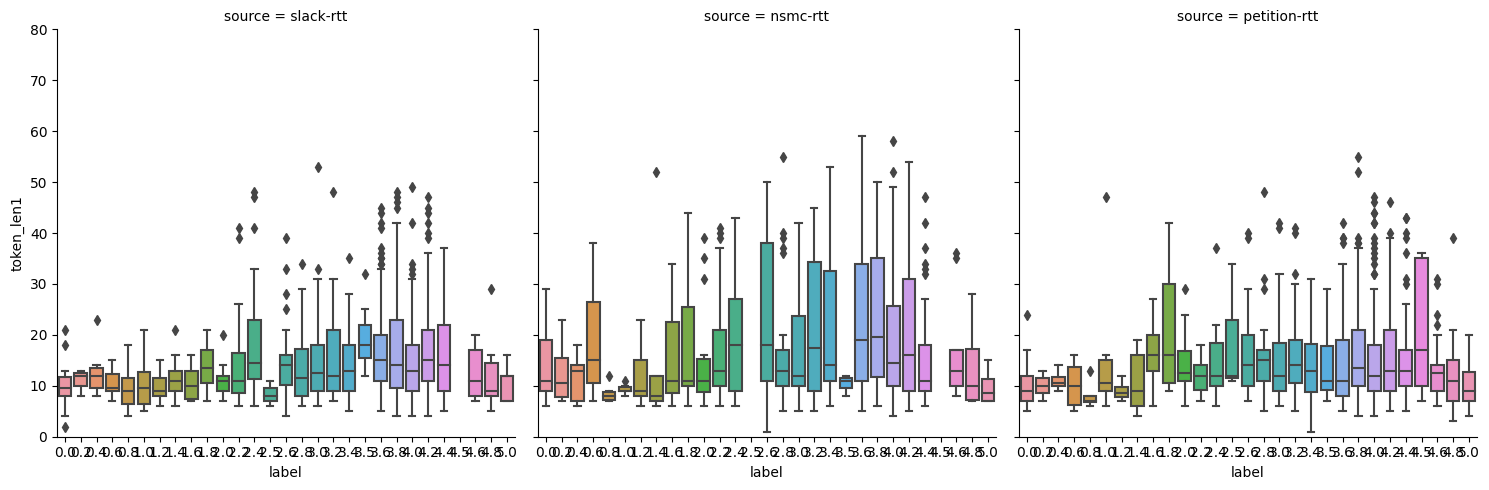

In [115]:
fig = plt.figure()
sns.catplot(x='label', y='token_len1', data=rtt_df, kind='box', col='source')
plt.ylim(0, 80)

(0.0, 80.0)

<Figure size 640x480 with 0 Axes>

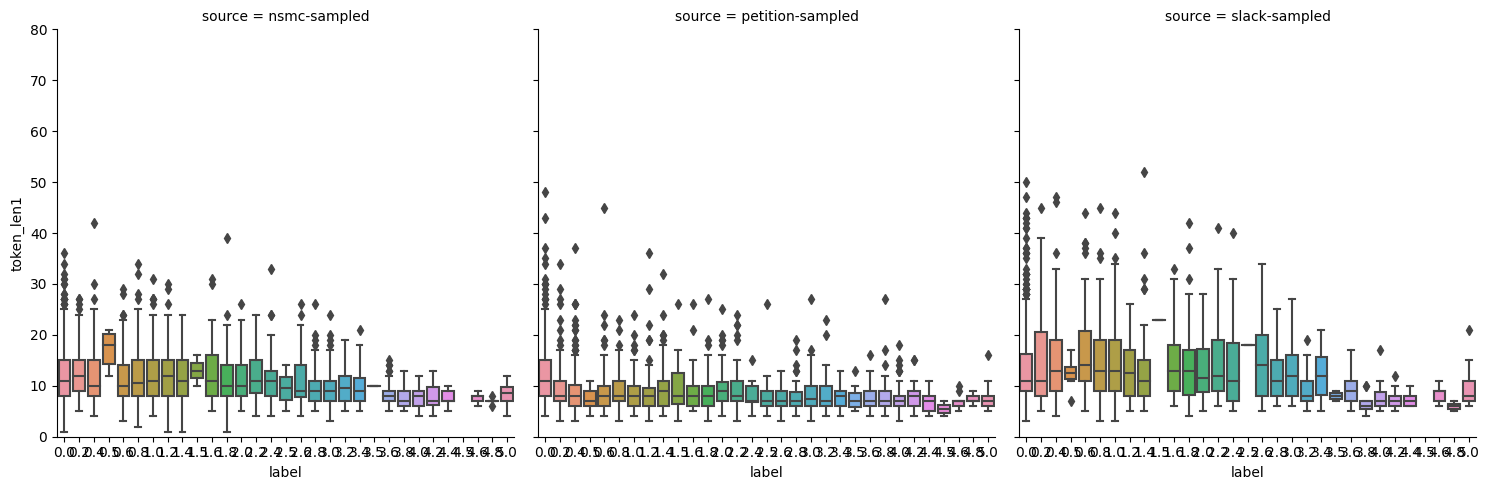

In [113]:
fig = plt.figure()
sns.catplot(x='label', y='token_len1', data=sampled_df, kind='box', col='source')
plt.ylim(0, 80)

In [76]:
x = train_df[train_df['source'].isin(['nsmc-rtt'])]
x = x[x['label'] > 3]
x = x[["sentence_1", "sentence_2", "label"]]
x.head(20)

,sentence_1,sentence_2,label
12,오랫만에 존쿠삭의 연기보니 좋네요 Good~~!!,오랜만에 존 쿠삭의 연기를 보니 반갑다. 좋아요~~!!,3.8
24,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,4.2
29,한사람의 파멸을 적나라하게 드러내 준 영화,한 사람의 파멸을 드러내는 영화,3.6
34,전설따라 삼천리(삼만리인가?)에 의하면 이 영화가 꽤 괜찮다고 할뿐 아니라 내가 좋...,전설에 따르면 삼천리(삼천리?)에 따르면 이 영화는 꽤 괜찮을 뿐만 아니라 내가 제...,4.0
58,중첩되는 장면들이 재밌다ㅋㅋ,겹치는 장면이 재미있다.,3.6
64,"변호사 시절 찍은 사진, 그렉으로 전시한 사진, 범죄현장을 포착한 사진마저 폴은 자...","변호사 시절 찍은 사진, 그렉과 함께 전시한 사진, 범행 현장 사진까지도 폴은 자신...",3.8
106,더 해피엔딩이였으면 좋았겠지만 근로 복지의 과제를 남겨준거 같아 좋습니다.,해피엔딩이었으면 좋았을 텐데 근로복지라는 숙제를 남겨주셔서 좋았습니다.,4.2
110,한국의 '귀신이 산다'나 '시실리ㅇkm'가 완성도 높다.,한국의 '귀신이 산다'와 '시칠리아 ㅇkm'는 완성도가 높다.,3.8
113,"무엇보다 최대한 원작의 분위기와 환경, 스토리를 살려야했는데 셋 다 정말 다른이야기...","무엇보다 원작의 분위기와 환경, 스토리를 최대한 살려야 했지만, 세 사람이 모두 다...",3.8
136,"이 작품의 주제는, 전쟁의 미화가 아니라 세계를 적으로 돌리며 전쟁을 하면 안된다는...",이 작품의 주제는 전쟁의 미화가 아니라 세계를 적으로 돌리면서 전쟁을 해서는 안 된...,3.6


In [74]:
x = train_df[train_df['source'].isin(['nsmc-sampled'])]
x = x[x['label'] > 3]
x = x[["sentence_1", "sentence_2", "label"]]
x.head(20)

,sentence_1,sentence_2,label
11,극의전개가너무느릿하여답답합니다,전개가 너무 느려서 속터진다,3.8
33,잘 만든 영화군요.,잘 만든 영화라고 생각한다.,3.6
40,이런 명작을 왜 이제봤을까..,왜 이런 명작을 이제야 본걸까,4.2
59,이건 진짜 대박임ㅇㅇ,이건 진짜 최고임.,3.8
165,평점에 속지맙시다 ㅠㅠ,어휴 ㅅㅂ 평점에 낚이지마세요,3.6
326,킬링타임 용도 아님,무슨 이건 킬링타임용도 안됨ㅋㅋ,3.4
341,오늘이 최종회여서 정말x 아쉬워요..,오늘이 마지막이라니 정말 아쉽다는...,4.0
438,난 참 재미있게 봤다,너무너무 재미있게 봤다,3.8
530,다시보고싶당~~시후,다시 보고 싶다!!!,4.0
536,전 정말 재밌게 잘 봤어요 자 자,이것도 정말 재밌게 잘 봤습니다,3.6


In [78]:
x = train_df[train_df['source'].isin(['nsmc-rtt'])]
x = x[x['label'] < 3]
x = x[["sentence_1", "sentence_2", "label"]]
x.head(20)

,sentence_1,sentence_2,label
5,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6
103,걍 회사이름도 얘기하지.,회사 이름도 언급하지 마십시오.,1.0
153,결론은 완전 노잼.,결론은 완전히 넌센스다.,1.8
226,"그런거 보면,배우란,해내면,참 좋은 직업갖기도 하고,실제 현장에서,고생하는거 보면,...","그러고 보니 배우가 할 수만 있다면 정말 좋은 직업을 가질 때도 있고, 현실에서 열...",2.8
279,이거보고재밋다고한혹우잇는가?,이거 보면 재밌을 것 같은데요?,0.4
297,두명이서이렇게끌고나갈수있다니!,2명이 이렇게 당길 수 있어요!,2.2
500,오버하지 않아도 자연스레 느껴지는 감동.,과하지 않고 자연스럽게 느껴지는 느낌.,2.8
515,시청률막올라갓으면좋겟다,등급만 올라가면 좋을텐데,0.6
557,비록 요즘 영화처럼 자극적인 과장은 없지만 황신혜를 향한 안성기의 진심어린 연기에 ...,요즘은 영화처럼 과언이 아닐지라도 황신혜를 향한 안성기의 진솔한 연기에 배창호 감독...,2.6
564,진저브리짓이라니..의외ㅋ어쩐지동생이늙어보인다니ㅋ,진저브리짓.. 형이 늙어보여서 놀람 ㅋㅋㅋㅋ,2.2


In [77]:
x = train_df[train_df['source'].isin(['nsmc-sampled'])]
x = x[x['label'] < 3]
x = x[["sentence_1", "sentence_2", "label"]]
x.head(20)

,sentence_1,sentence_2,label
0,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2
7,이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ,이렇게 지겨운 공포영화는 처음..,0.6
13,글쎄.. 특색도 없고 별로였던 걸로 기억하는데..,큰 반전 없던걸로 기억하는데...,1.8
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,조금유치하지만 가볍게 볼수는 있는영화네요!,0.0
38,아무리그래도 걸어간다는 설정은쫌-_-;,허나 알리슨 로먼이 벗은건 충격 -_-;;,0.0
47,동생이랑같이봤는데살인데 그닥무서워하지않고 잘본것같음....,내용도 그렇고 별로 맘에들지않는다.......,0.0
51,우리 아이들이 안 봤으면 좋겠어요.,아이들이랑 보기 좋을거 같아요.,0.6
53,"다만, 관객에 대한 배려가 없다.",이 정도 수준으로 영화관에 내보내는건 관객에 대한 모독이다.,1.8
55,근데 멜로연기는 영 ㅋㅋㅋ,유령나올때 멜로디는 어릴때 충격적이였지 ㅋㅋㅋ,0.0
56,제일 좋은것같던데..,난이게 제일 재밌었는데..,1.6
